<a href="https://colab.research.google.com/github/kkknewbie9/MchineLrn/blob/main/Day_14_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('/content/Mall_Customers.csv')

x = dataset.iloc[:, [3,4]].values   # because it is unsupervised learning we don't take y

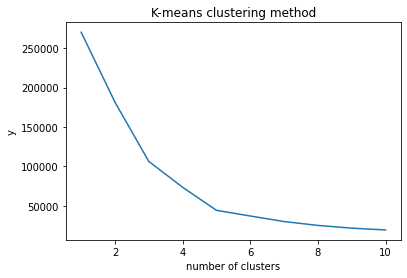

In [4]:
# find the optimal number of clusters based on the data

from sklearn.cluster import KMeans

lst = []  #to map the entries of the dataset empty list created

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)  # kmeans++ will automatically decide what to do if there's empty value in dataset
  kmeans.fit(x)
  lst.append(kmeans.inertia_)  # list needs to reset after 1 cluster is done so that next cluster can start with 0

# K-means clustering will consider 'Elbow' method to identify the cluster and nodes
#Distance based method works on eucledian distance method

plt.plot(range(1,11), lst)
plt.title('K-means clustering method')
plt.xlabel('number of clusters')
plt.ylabel('y')
plt.show()


In [5]:
# We need to train the model

kmeans = KMeans(n_clusters = 5, init = 'k-means++')

y_kmeans = kmeans.fit_predict(x)

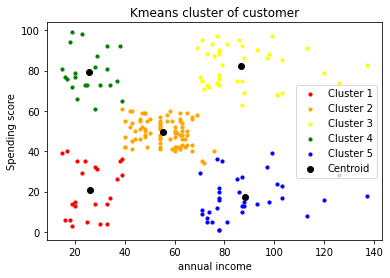

In [7]:
# Visulalize dataset in 5 diff clusters

plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 10, c = 'red', label = 'Cluster 1')

plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 10, c = 'Orange', label = 'Cluster 2')

plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 10, c = 'Yellow', label = 'Cluster 3')

plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s = 10, c = 'green', label = 'Cluster 4')

plt.scatter(x[y_kmeans == 4,0], x[y_kmeans == 4,1], s = 10, c = 'blue', label = 'Cluster 5')

# Create centroid

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c= 'black', label = 'Centroid')

plt.title('Kmeans cluster of customer')
plt.xlabel('annual income')
plt.ylabel('Spending score')

plt.legend()
plt.show()
